In [21]:
import numpy as np
import pandas as pd
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [23]:
print(movies.columns)
print(len(movies))

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')
559


In [25]:
movies.columns = ["Film","Genre",'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [26]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


### Modify the Film Genre and Year data type to categorical data type

In [28]:
movies.Film = pd.Categorical(movies.Film)
movies.Genre = pd.Categorical(movies.Genre)
movies.Year = pd.Categorical(movies.Year)

In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [33]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


### Joint Plot

In [150]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

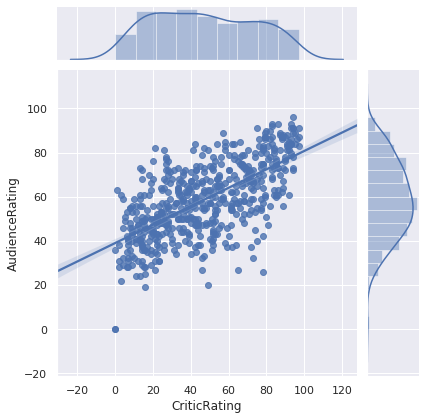

In [151]:
j1 = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind="reg")

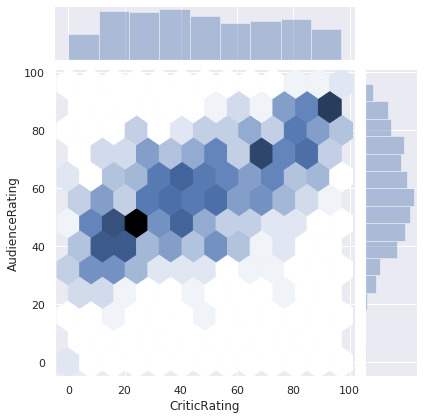

In [48]:
j2 = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind="hex")

#### KDE = Kernel Density Estimation Plot

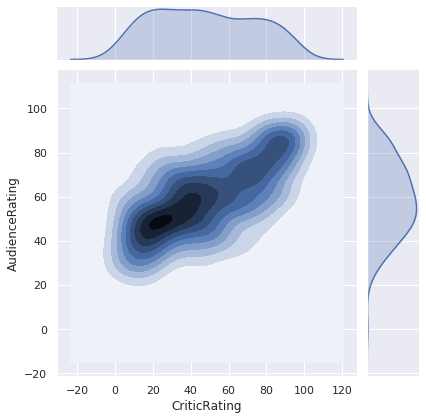

In [46]:
j3 = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind="kde")

### Histograms

In [50]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


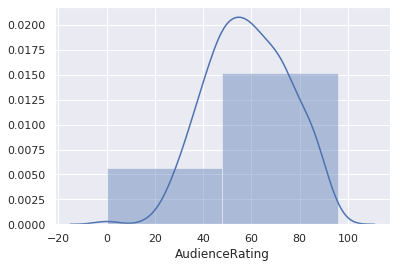

In [58]:
sns.distplot(movies.AudienceRating, bins=2)

Text(0.5, 1.0, 'Budget Distribution')

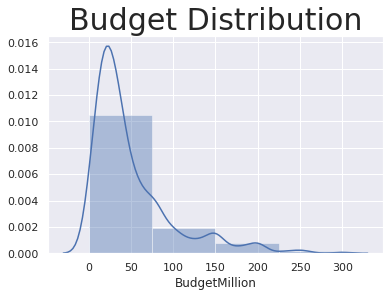

In [170]:
sns.distplot(movies.BudgetMillion, bins=4).set_title("Budget Distribution", fontsize=30)    #Bins is number of boxes

### plotting same graph With pyplot (internally seaborn uses pyplot)

[]

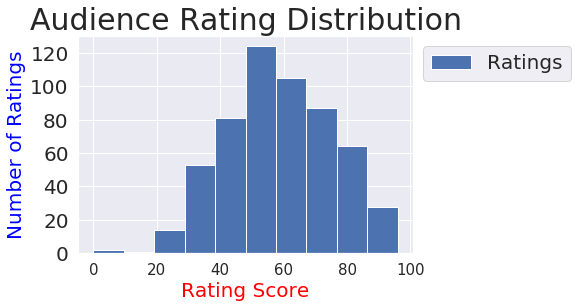

In [198]:
plt.hist(movies.AudienceRating, label="Ratings")
plt.title("Audience Rating Distribution",fontsize=30)
plt.ylabel("Number of Ratings",fontsize=20, color="blue")
plt.xlabel("Rating Score", fontsize=20, color="red")
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=20, frameon=True, fancybox=True)
# plt.legend(prop={'color':"red"})
plt.plot()

---

# Merging Histograms

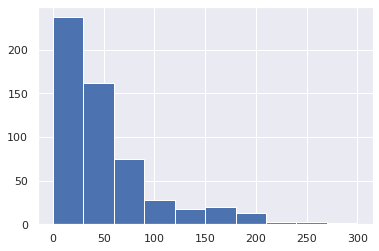

In [69]:
h1 = plt.hist(movies.BudgetMillion)

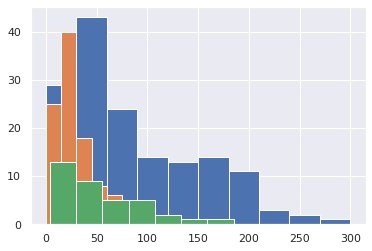

In [89]:
#ploting budget by Genre
plt.hist(movies[movies.Genre=='Action'].BudgetMillion, bins=10)

#adding on stack
plt.hist(movies[movies.Genre=='Drama'].BudgetMillion, bins=10)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillion, bins=7)

plt.show()

### But this are vertically stacked over each other, to get difference bar chart we will list all data as a list

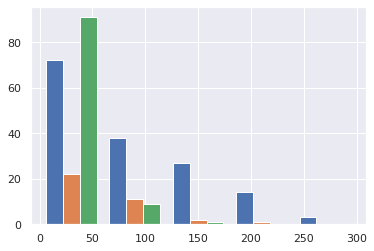

In [93]:
plt.hist([movies[movies.Genre=='Action'].BudgetMillion,movies[movies.Genre=='Thriller'].BudgetMillion,\
         movies[movies.Genre=='Drama'].BudgetMillion], bins=5)
plt.show()

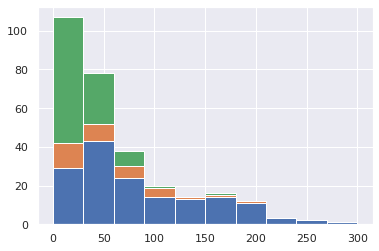

In [95]:
#STACKED = TRUE
plt.hist([movies[movies.Genre=='Action'].BudgetMillion,movies[movies.Genre=='Thriller'].BudgetMillion,\
         movies[movies.Genre=='Drama'].BudgetMillion], bins=10, stacked=True)
plt.show()

In [125]:
print(movies.Genre.cat.categories)

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')


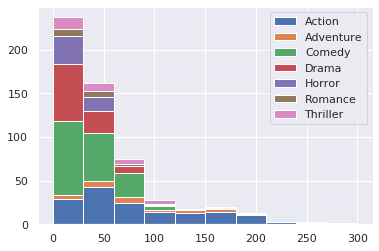

In [148]:
li = list()
lab = list()
for gen in movies.Genre.cat.categories:
    li.append(movies[movies.Genre==gen].BudgetMillion) #Appending different list everytime
    lab.append(gen)
    
plt.hist(li,stacked=True,label=lab)

plt.legend()
plt.show()

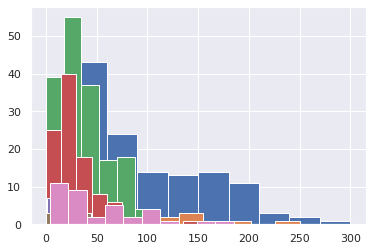

In [144]:
for gen in movies.Genre.cat.categories:
    plt.hist(movies[movies.Genre==gen].BudgetMillion, histtype="barstacked")#stepfilled, step, bar
plt.show()

In [149]:
#Seaborn is update on Pyplot of matplot lib
#violin Plot from axes because axes is a PI plot object

#f, axes = plt.subplot # axes  which is plt object doesnt knows anything about sns objects and stuff 

#So that means axes is created within the pylot package.

#The thing about seaborne is that Seaborn is an upgrade on top of pipelined.

#  To create a pyplot chart over the axes grid which is not a SNS plot, we write

#                  axes[0][1].hist(movies.CriticRating)
            
#                                 instead of 
            
#              sns.violinplot(data=movies, x="AudienceRating",y="CriticRating")
#                                     
#                                     but
# #                 
#                         axes.violinplot() won't work...